In [1]:
from find_and_judge import *

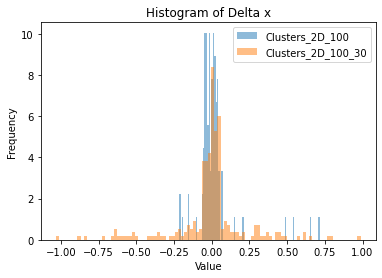

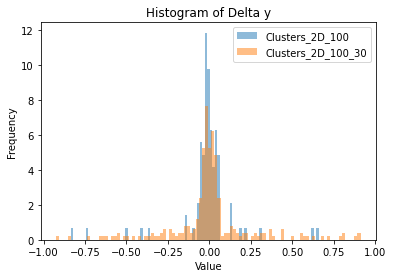

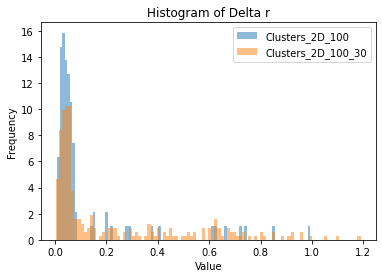

In [2]:
'''
algorithms: 'local maxima', 'local maxima denoised', 'local maxima denoised double', 
'hr local maxima denoised', 'hr local maxima denoised double'
'''
images = read_in_data('./Clusters_2D_100.txt')
found = find_points(images, 'local maxima denoised', 2, num_of_images=10)
result1 = judge(images, found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
found_30 = find_points(images_30, 'local maxima denoised', 2, num_of_images=10)
result2 = judge(images_30, found_30)
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

Image 7 Raw Data
Not Found: (7, 5)
[[ 854. 1175. 1254.  704.  192.]
 [3397. 3693. 3790. 2230.  533.]
 [4932. 4867. 4561. 2644.  638.]
 [2857. 2550. 2253. 1212.  288.]
 [ 683.  514.  428.  215.   53.]]


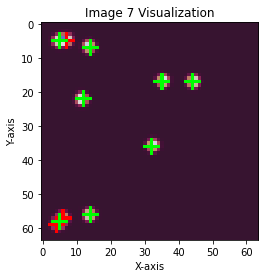

In [3]:
result1.show_error(images, found)

Image 1 Raw Data
Not Found: (55, 6)
[[  22.  122.  297.  214.   83.]
 [ 135.  752. 1648. 1515.  579.]
 [ 306. 1739. 3839. 3771. 1918.]
 [ 306. 1644. 3748. 4408. 3823.]
 [ 114.  629. 1753. 3214. 4741.]]


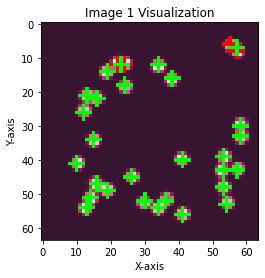

Image 6 Raw Data
Not Found: (25, 30)
[[ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]
 [6788. 4932. 4043. 1759.  379.]
 [3403. 1945. 1356.  581.   85.]]


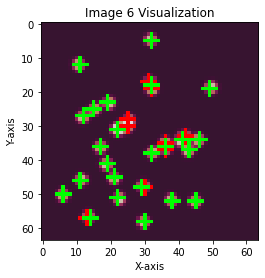

Image 6 Raw Data
Not Found: (25, 28)
[[  33.  129.  296.  270.   91.]
 [ 149.  787. 1692. 1483.  557.]
 [ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]]


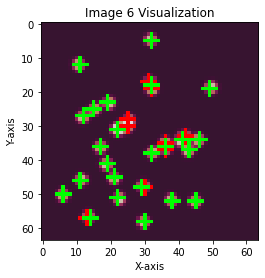

Image 7 Raw Data
Not Found: (20, 54)
[[6188. 5693. 3841. 1848.  574.]
 [4391. 4767. 5129. 3730. 1365.]
 [1366. 2299. 4012. 3695. 1423.]
 [ 226.  766. 1560. 1577.  577.]
 [  21.  113.  274.  245.  100.]]


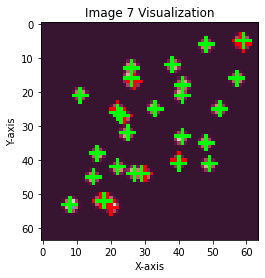

Image 8 Raw Data
Not Found: (48, 28)
[[1087. 1108.  922.  427.   87.]
 [4571. 4228. 3486. 1549.  317.]
 [8552. 7325. 5042. 2181.  391.]
 [7362. 5437. 3128. 1280.  252.]
 [3293. 2674. 1535.  527.   86.]]


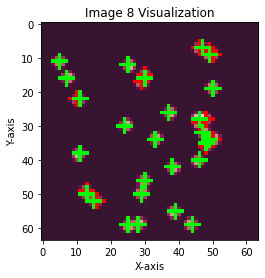

In [4]:
result2.show_error(images_30, found_30)

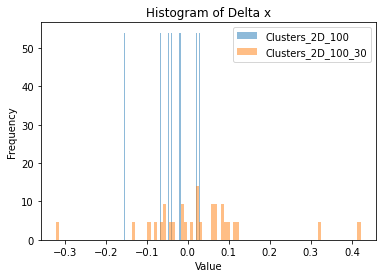

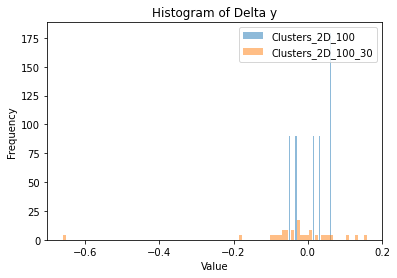

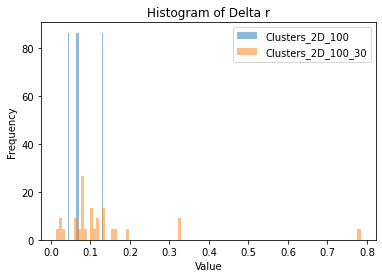

In [5]:
'''
algorithms: 'local maxima', 'local maxima denoised', 'local maxima denoised double', 
'hr local maxima denoised', 'hr local maxima denoised double'
'''
images = read_in_data('./Clusters_2D_100.txt')
hr_found = find_points(images, 'hr local maxima denoised', 2, num_of_images=1)
hr_result1 = judge(images, hr_found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
hr_found_30 = find_points(images_30, 'hr local maxima denoised', 2, num_of_images=1)
hr_result2 = judge(images_30, hr_found_30)
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(hr_result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(hr_result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(hr_result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(hr_result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(hr_result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(hr_result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

In [6]:
hr_result1.show_error(images, hr_found)

None


In [7]:
hr_result2.show_error(images_30, hr_found_30)

None
